In [1]:
#imports
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt

from non_layered_neural_net import nlnn



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


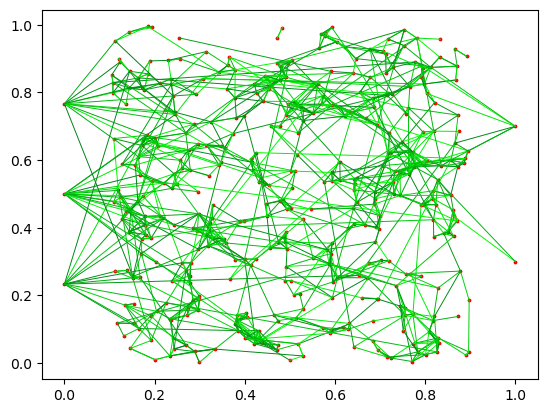

In [2]:
net = nlnn(hidden_neurons= 400, input_neurons = 3, output_neurons = 2)
net.initialise_structure(connection_probability_dropoff=3, connection_probabily_scalar=0.00003)
net.display_net()

In [3]:
#load dataset
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
#filtering out everythin but the 7s and 1s
mod_x_train = np.array([train_X[i] for i in range(len(train_X)) if train_y[i]==7 or train_y[i]==1])
mod_y_train = np.array([train_y[i] for i in range(len(train_X)) if train_y[i]==7 or train_y[i]==1])
mod_x_test = np.array([test_X[i] for i in range(len(test_X)) if test_y[i]==7 or test_y[i]==1])
mod_y_test = np.array([test_y[i] for i in range(len(test_X)) if test_y[i]==7 or test_y[i]==1])

#1-hot encoding
one_hot_y_train = np.zeros((len(mod_y_train), 2))
for i in range(len(mod_y_train)):
    if mod_y_train[i] == 1:
        one_hot_y_train[i][0]=1
    else:
        one_hot_y_train[i][1]=1
        
one_hot_y_test = np.zeros((len(mod_y_test), 2))
for i in range(len(mod_y_test)):
    if mod_y_test[i] == 1:
        one_hot_y_test[i][0]=1
    else:
        one_hot_y_test[i][1]=1
        
print(one_hot_y_train.shape)
print(one_hot_y_test.shape)
        
#flatten images
mod_x_train = mod_x_train.reshape(len(mod_x_train), 28*28)
mod_x_test = mod_x_test.reshape(len(mod_x_test), 28*28)

(13007, 2)
(2163, 2)


In [5]:
#setting up conventional model 
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_shape=(28*28,), activation='sigmoid'))
#model.add(Dense(8, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])


Metal device set to: Apple M1 Pro


2023-03-01 12:28:25.812929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-01 12:28:25.813052: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.fit(mod_x_train, one_hot_y_train, epochs=10, batch_size=32)

Epoch 1/10


2023-03-01 12:28:25.911504: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-01 12:28:26.024506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


407/407 [==============================] - 2s 5ms/step - loss: 0.5400 - accuracy: 0.9278
Epoch 2/10
407/407 [==============================] - 2s 4ms/step - loss: 0.3955 - accuracy: 0.9757
Epoch 3/10
407/407 [==============================] - 2s 5ms/step - loss: 0.3124 - accuracy: 0.9841
Epoch 4/10
407/407 [==============================] - 2s 5ms/step - loss: 0.2587 - accuracy: 0.9866
Epoch 5/10
407/407 [==============================] - 2s 5ms/step - loss: 0.2216 - accuracy: 0.9844
Epoch 6/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1900 - accuracy: 0.9893
Epoch 7/10
407/407 [==============================] - 2s 4ms/step - loss: 0.1650 - accuracy: 0.9914
Epoch 8/10
407/407 [==============================] - 2s 4ms/step - loss: 0.1483 - accuracy: 0.9925
Epoch 9/10
407/407 [==============================] - 2s 5ms/step - loss: 0.1365 - accuracy: 0.9895
Epoch 10/10
407/407 [==============================] - 2s 4ms/step - loss: 0.1259 - accuracy: 0.9929


In [7]:
#evaluate model
accuracy = model.evaluate(mod_x_test, one_hot_y_test)
print(accuracy)

43/68 [=================>............] - ETA: 0s - loss: 0.1362 - accuracy: 0.9891

2023-03-01 12:28:44.559908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.9912
[0.1279737949371338, 0.9912159442901611]


In [8]:
#try on all classes
#one hot encode
def one_hot_encode(x):
    out = np.zeros((len(x), max(x)+1))
    for i in range(len(x)):
        out[i][x[i]] = 1
    return out

y_train_ohe = one_hot_encode(train_y)
y_test_ohe = one_hot_encode(test_y)
#flatten images
x_train = train_X.reshape(len(train_X), 28*28)
x_test = test_X.reshape(len(test_X), 28*28)


model_all = Sequential()
#model_all.add(Dense(3, input_shape=(28*28,), activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model_all.add(Dense(10, activation='softmax'))

# compile the keras model
model_all.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model_all.fit(x_train, y_train_ohe, epochs=10, batch_size=32)

Epoch 1/10
  32/1875 [..............................] - ETA: 6s - loss: 22.0701 - accuracy: 0.5674 

2023-03-01 12:28:44.987757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 3ms/step - loss: 5.7899 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4.8076 - accuracy: 0.8508
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4.6739 - accuracy: 0.8552
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4.6482 - accuracy: 0.8555
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4.6340 - accuracy: 0.8584
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4.6180 - accuracy: 0.8582
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.5046 - accuracy: 0.8582
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.4664 - accuracy: 0.8618
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.5766 - accuracy: 0.8612
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.5318 - accurac

In [9]:
#setting up evolutionary pipeline
#creating initial population
population_size = 10
def create_population(population_size):
    population = []
    print("Creating networks")
    for i in range(population_size):
        net = nlnn()
        net.initialise_structure(connection_probability_dropoff=3, connection_probabily_scalar=0.00003)
        population.append(net)
        print("|", end="")

    print("done!")
    return population


networks = create_population(population_size)

Creating networks
||||||||||done!


In [10]:
def get_perf(t):
        return t[0]

#measure performance of all the networks
def evaluate_performance(population):
    performances = []
    print("evaluating performances")
    for net in population:
        correct_count = 0
        for i in range(len(mod_x_test)):
            prediction = net.predict(mod_x_test[i], 10)[0]
            #print(prediction, one_hot_y_train[i])
            if (prediction == one_hot_y_test[i]).all():
                correct_count+=1
                #print(prediction, one_hot_y_train[i])
        performances.append((correct_count/len(mod_x_test), net))
        #print(correct_count/len(mod_x_test))
        print("|", end="")
    print("done!")
    #sort by best performance
    performances.sort(key = get_perf, reverse = True)
    return performances

evaluated_networks = evaluate_performance(networks)

evaluating performances
||||||||||done!


In [23]:
#the n best performing networks will be selected
n = 5
mutation_range = 0.1

def repopulate(evaluated_networks, mutation_range):
    offspring_per_network = int(population_size/n)
    next_gen = [i[1] for i in evaluated_networks[:n]]
    for net in next_gen:
        next_gen = next_gen+net.reproduce(offspring_per_network, mutation_range)
    return next_gen
    
next_generation = repopulate(evaluated_networks, mutation_range)
print(type(next_generation))

<class 'list'>


In [24]:
generations = 10
print(type(next_generation))
for gen in range(generations):
    evaluated_networks = evaluate_performance(next_generation)
    print("best performer of generation "+str(gen)+":", evaluated_networks[0][0])
    next_generation = repopulate(evaluated_networks, mutation_range)
    

<class 'list'>
evaluating performances
|||||||||||||||done!
best performer of generation 0: 0.7165973185390662
evaluating performances
|||||||||||||||done!
best performer of generation 1: 0.7175219602404068
evaluating performances
|||||||||||||||done!
best performer of generation 2: 0.7267683772538142
evaluating performances
|||||||||||||||done!
best performer of generation 3: 0.7323162274618585
evaluating performances
|||||||||||||||done!
best performer of generation 4: 0.7471104946833103
evaluating performances
|||||||||||||||done!
best performer of generation 5: 0.7572815533980582
evaluating performances
|||||||||||||||done!
best performer of generation 6: 0.7614424410540915
evaluating performances
|||||||||||||||done!
best performer of generation 7: 0.7660656495607951
evaluating performances
|||||||||||||||done!
best performer of generation 8: 0.7669902912621359
evaluating performances
|||||||||||||||done!
best performer of generation 9: 0.7693018955154878
